## The Traveling Salesman Problem (TSP)

### Problem

Consider a set if $n$ cities $N =\{ 1, 2, \ldots, n \}$.

A salesman must visit each of $n$ cities exactly once and then return to his starting point.

The time taken to travel from city $i$ to city $j$ is $c_{ij}, \ i \not= j$.

Find the order in which he should make his tour so as to finish as quickcly as possible.

### Applications

This problem arises in a multitude of forms:
- a truck driver has a list of clients he must visit on a given day.
- a machine must place modules on printed circuit boards.
- a stacker crane must pick up and depose crates.

### TSP formulation as a BIP

#### The variables:

- $x_{ij} = 1$ if the salesman goes directly from town $i$ to town $j$, and $x_{ij}= 0$ otherwise, for $i \not= j$.

#### The constraints:

- He leaves town $i$ exactly once:
$$
\sum_{j:j\not=i} x_{ij} = 1 \quad for \quad i=1, \ldots, n
$$

- He arrives at town $j$ exactly once:
$$
\sum_{i:i\not=j} x_{ij} = 1 \quad for \quad j=1, \ldots, n
$$

So far the are the constraints of the assigment problem.

A solution to the assigment problem might given a solution of the form a set of disconnected subtours.

To eliminate these solutions, we need more constraints that guarantee connectivity by imposing that the salesman must pass from one set of cities to another: cut-set constraints or subtour eliminations constraints.

- Cut-set constraints:
$$
\sum_{i \in S} \sum_{j \notin S} x_{ij} \geq 1, \quad S \subset N, \quad S \not= \emptyset
$$

- subtour elimination contraints:
$$
\sum_{i \in S} \sum_{j \in S} x_{ij} \leq | S | - 1, \quad S \subset N, \quad 2 \leq | S | \leq n -1 
$$

- Miller-Tucker-Zemlin (MTZ) subtour elimination constraints

For each $i \in V$ let $u_i \in \mathbb{R}_{+}$ be an auxiliary variable.

The subtour elimination constraints work by labeling the order in which the nodes are visited. 

The variable $u$ be the rank of each node in order of visits. 

If $x_{ij} = 1$ then $u_i +1 = u_j$ for $i=1,2, \ldots, n$, $j=1,2, \ldots, n$, $i<j$.

#### The objective function:
$$
\min \ \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij} x_{ij}
$$

### Complexity

Starting at city 1, the salesman has $n$-1 choices.

For the next choice $n$-2 cities are possible, and so on.

Thus there ares ($n$-1)! feasible tours.

The tabel show how rapidly certain functions grow. 

| $n$ | $n$! |
|-----|------|
| 10  |$3.6 \times 10^{6}$ |
| 100 |$9.33 \times 10^{157}$ |
| 1000 | $4.02 \times 10^{2567}$ |

In [41]:
# lyibrary

import gurobipy as gp
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# criando os vértices
n = 30
vertices = [i for i in range(n)]

In [43]:
# criando os arcos
arcos = [(i,j) for i in vertices for j in vertices if i!=j]

In [44]:
# coordenadas
np.random.seed(0)
X = np.random.random(n)*100
Y = np.random.random(n)*100

In [45]:
# distancias
c = {(i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in vertices for j in vertices if i!=j}

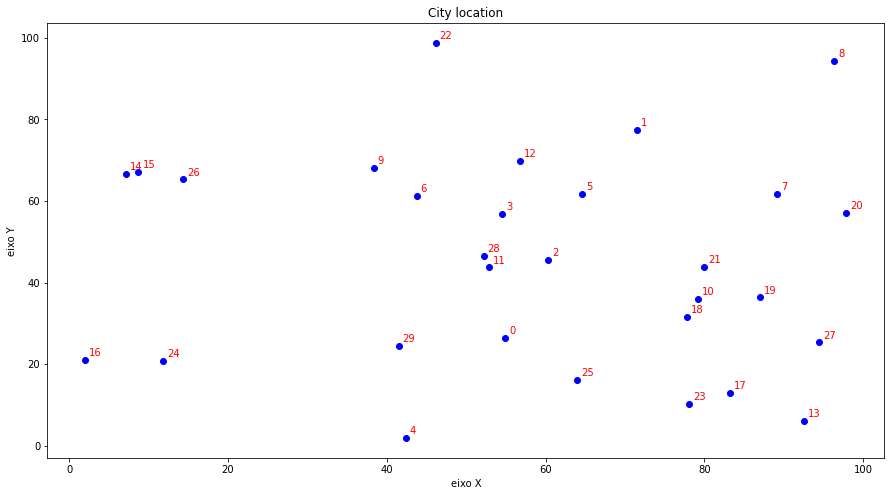

In [46]:
# grafic

plt.figure(figsize=(15,8))
plt.scatter(X,Y,color='blue')

for n in range(len(X)):
    plt.annotate(str(n), xy=(X[n],Y[n]), xytext = (X[n]+0.5, Y[n]+1), color='red')

plt.xlabel("eixo X")
plt.ylabel("eixo Y")
plt.title("City location")
plt.show()

In [54]:
# assingment model

model = gp.Model("assign")

# variables
x = model.addVars(arcos, vtype = gp.GRB.BINARY, name = 'x')

# objective
model.setObjective(gp.quicksum(c[e] * x[e] for e in arcos), gp.GRB.MINIMIZE)

# constraints
model.addConstrs(gp.quicksum(x[i,j] for j in vertices if j!=i) == 1 for i in vertices)
model.addConstrs(gp.quicksum(x[i,j] for i in vertices if i!=j) == 1 for j in vertices)

# parameters
model.Params.timeLimit = 600
model.Params.MIPGap = 0.001

# solve
model.optimize()

Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.001
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)



CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 60 rows, 870 columns and 1740 nonzeros
Model fingerprint: 0x4ed1bc97
Variable types: 0 continuous, 870 integer (870 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1643.1009670
Presolve time: 0.01s
Presolved: 60 rows, 870 columns, 1740 nonzeros
Variable types: 0 continuous, 870 integer (870 binary)

Root relaxation: objective 3.883259e+02, 50 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     388.3258800  388.32588  0.00%     -    0s

Explored 1 nodes (50 simplex iterati

In [55]:
# print solution

def print_sol(mode):
    print("optimal:", str(round(model.objVal,2)))

    for v in model.getVars():
        if v.x > 0.9:
            print(str(v.VarName)+"="+str(v.x))

print_sol(model)

optimal: 388.33
x[0,25]=1.0
x[1,8]=1.0
x[2,28]=1.0
x[3,5]=1.0
x[4,29]=1.0
x[5,3]=1.0
x[6,9]=1.0
x[7,20]=1.0
x[8,1]=1.0
x[9,6]=1.0
x[10,18]=1.0
x[11,2]=1.0
x[12,22]=1.0
x[13,27]=1.0
x[14,15]=1.0
x[15,26]=1.0
x[16,24]=1.0
x[17,23]=1.0
x[18,10]=1.0
x[19,21]=1.0
x[20,7]=1.0
x[21,19]=1.0
x[22,12]=1.0
x[23,17]=1.0
x[24,16]=1.0
x[25,0]=1.0
x[26,14]=1.0
x[27,13]=1.0
x[28,11]=1.0
x[29,4]=1.0


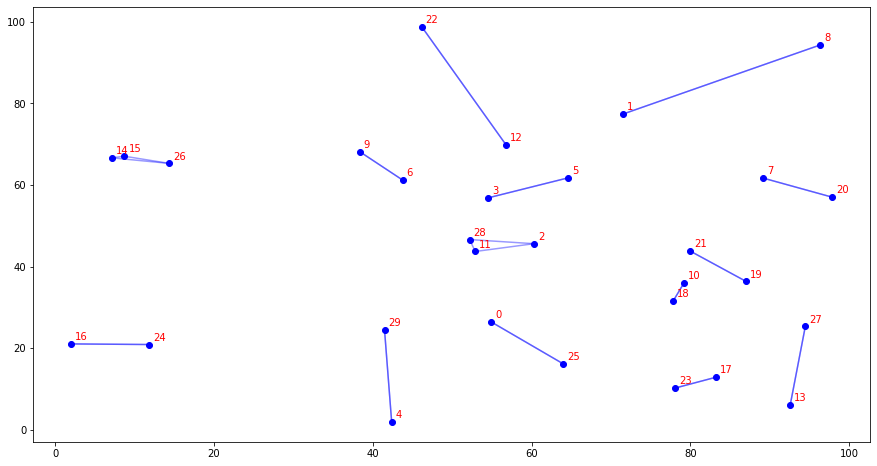

In [56]:
# grafic sol

def grafic_sol(x, X, Y):
    arcos_ativos = [i for i in arcos if x[i].x > 0.9]
    #print(arcos_ativos)

    plt.figure(figsize = (15,8))
    plt.xlabel
    plt.ylabel

    plt.scatter(x=X, y=Y, color='blue', zorder=1)

    # line between arcos
    for i,j in arcos_ativos:
        plt.plot([X[i],X[j]],[Y[i],Y[j]], color='b', alpha=0.4, zorder=0)

    for n in range(len(X)):
        plt.annotate(str(n), xy=(X[n],Y[n]), xytext=(X[n]+0.5, Y[n]+1), color='red')

    plt.show()

# grafic assigment sol
grafic_sol(x, X, Y)

In [57]:
# tsp model with mtz

model = gp.Model("mtz_tsp")

# variables
x = model.addVars(arcos, vtype = gp.GRB.BINARY, name = 'x')
u = model.addVars(vertices, vtype = gp.GRB.CONTINUOUS, name = 'u')

# objective
model.setObjective(gp.quicksum(c[e] * x[e] for e in arcos), gp.GRB.MINIMIZE)

# constraints
model.addConstrs(gp.quicksum(x[i,j] for j in vertices if j!=i) == 1 for i in vertices)
model.addConstrs(gp.quicksum(x[i,j] for i in vertices if i!=j) == 1 for j in vertices)
model.addConstrs((x[i,j] == 1) >> (u[i]+1 == u[j]) for i,j in arcos if j!=0)

# parameters
model.Params.timeLimit = 600
model.Params.MIPGap = 0.001

# solve
model.optimize()

Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.001
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 60 rows, 900 columns and 1740 nonzeros
Model fingerprint: 0xd09fa49c
Model has 841 general constraints
Variable types: 30 continuous, 870 integer (870 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 841 rows and 841 columns
Presolve time: 0.01s
Presolved: 901 rows, 1741 columns, 3857 nonzeros
Presolved model has 841 SOS constraint(s)
Variable types: 871 continuous, 870 integer (870 binary)

Root relaxation: objective 3.883259e+02, 97 iterations, 0.00 seconds (0.00 wor

In [51]:
# solution mtz tsp
print_sol(model)

optimal: 490.91
x[0,29]=1.0
x[1,8]=1.0
x[2,5]=1.0
x[3,28]=1.0
x[4,24]=1.0
x[5,12]=1.0
x[6,3]=1.0
x[7,20]=1.0
x[8,7]=1.0
x[9,6]=1.0
x[10,18]=1.0
x[11,2]=1.0
x[12,22]=1.0
x[13,17]=1.0
x[14,15]=1.0
x[15,26]=1.0
x[16,14]=1.0
x[17,23]=1.0
x[18,19]=1.0
x[19,27]=1.0
x[20,21]=1.0
x[21,10]=1.0
x[22,1]=1.0
x[23,25]=1.0
x[24,16]=1.0
x[25,0]=1.0
x[26,9]=1.0
x[27,13]=1.0
x[28,11]=1.0
x[29,4]=1.0
u[1]=17.0
u[2]=13.0
u[3]=10.0
u[4]=2.0
u[5]=14.0
u[6]=9.0
u[7]=19.0
u[8]=18.0
u[9]=8.0
u[10]=22.0
u[11]=12.0
u[12]=15.0
u[13]=26.0
u[14]=5.0
u[15]=6.0
u[16]=4.0
u[17]=27.0
u[18]=23.0
u[19]=24.0
u[20]=20.0
u[21]=21.0
u[22]=16.0
u[23]=28.0
u[24]=3.0
u[25]=29.0
u[26]=7.0
u[27]=25.0
u[28]=11.0
u[29]=1.0


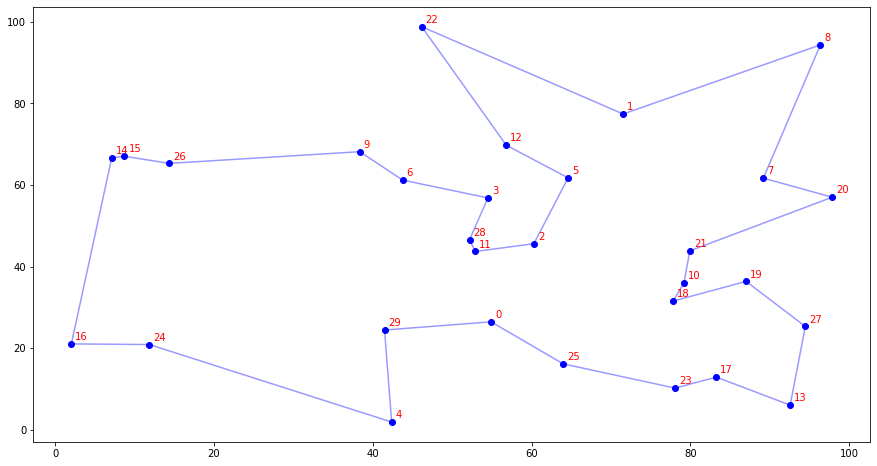

In [52]:
# graphic mtz tsp
grafic_sol(x,X,Y)

### References

[1] D. L. Applegate, R. E. Bixby, V. Chvatal and W. J. Cook , The Traveling Salesman Problem: A Computational Study, Princeton University Press, Princeton, 2006.

[2] http://www.math.uwaterloo.ca/tsp/index.html

[3] https://www.youtube.com/watch?v=q8nQTNvCrjE&t=35s

[4] http://www.math.uwaterloo.ca/tsp/concorde.html

[5] https://github.com/Gurobi/modeling-examples/tree/master/traveling_salesman